In [1]:
import pymatgen
import os
import unittest
import warnings
from numbers import Number

from pathlib import Path
#from collections import OrderDict
import numpy as np
from pymatgen.analysis.phase_diagram import(CompoundPhaseDiagram, PDEntry, PDPlotter, PhaseDiagram, ReactionDiagram, TransformedPDEntry, tet_coord, triangular_coord, uniquelines, uniquelines)
from pymatgen.core.composition import Composition
from pymatgen.core.periodic_table import DummySpecies, Element
from pymatgen.entries.computed_entries import ComputedEntry
from pymatgen.entries.entry_tools import EntrySet
from pymatgen.analysis.phase_diagram import Composition

In [13]:
input_data = {"Ca2Mn3O8":-152.56351,"Ca2MnO4":-80.831838,"Ca3Mn2O14Si4":-259.799655, 
              "Ca3Mn2Si3O12":-228.409598,  "CaMn2O4":-86.587565, "CaMn4Si5O15":-293.440865,
              "CaMn6SiO12":-246.506575, "CaMn7O12":-249.57392,  "CaMnSi2O6":-114.49429,
              "Mn2SiO4":-87.54651, "Mn4SiO7":-150.74472, "Mn5Si3O12":-245.984375, "Mn7SiO12":-251.54555,
              "MnSiO3":-59.605772, 
              
              #"CaSiO3":-54.816605, 
             # "Ca2SiO4":-77.546325, "Ca3Si2O7":-132.383868,"Ca3SiO":-53.2873387,
                   
              #"Ca3SiO5":-99.8492667, "CaSi2O5":-85.967765, 
              
              "MnSi2O5":-90.67979,
              "Ca4Mn3O10":-194.420795, "CaMnO3":-58.29231 , "Ca3Mn2O7":-139.1215, 
              
              "Mn2O3":-63.684207, "MnO":-27.759088, "MnO2":-35.332674,
              "Mn3O4":-91.811649, 
              
              "CaO":-22.355494, "SiO2":-31.5938, "O2":-12.3101, "Si":-5.4252155, "Ca":-9.6682, "Mn":-16.982424, 
              
              "Ca4Mn2Si3O12":-240.99698, "Ca2Mn2Si3O12":-209.866955}
              
              
              


In [14]:
from pymatgen.analysis.phase_diagram import Composition

entries =[PDEntry(k,v) for k,v in input_data.items()]

phase_diagram_1 = PhaseDiagram(entries)
plotter_1 = PDPlotter(phase_diagram_1, show_unstable=True, markersize=20)
plotter_1.show() 
print(phase_diagram_1.stable_entries)

{PDEntry : Ca1 O1 with energy = -22.3555, PDEntry : Mn1 with energy = -16.9824, PDEntry : Ca2 Mn1 O4 with energy = -80.8318, PDEntry : Si1 with energy = -5.4252, PDEntry : Mn3 O4 with energy = -91.8116, PDEntry : Ca1 Mn2 O4 with energy = -86.5876, PDEntry : Mn5 Si3 O12 with energy = -245.9844, PDEntry : Ca1 Mn7 O12 with energy = -249.5739, PDEntry : Mn1 O1 with energy = -27.7591, PDEntry : O2 with energy = -12.3101, PDEntry : Ca1 Mn1 Si2 O6 with energy = -114.4943, PDEntry : Mn1 O2 with energy = -35.3327, PDEntry : Mn2 O3 with energy = -63.6842, PDEntry : Ca2 Mn3 O8 with energy = -152.5635, PDEntry : Ca3 Mn2 Si3 O12 with energy = -228.4096, PDEntry : Ca1 Mn4 Si5 O15 with energy = -293.4409, PDEntry : Ca1 with energy = -9.6682, PDEntry : Si1 O2 with energy = -31.5938}


In [15]:
decomp_1= phase_diagram_1.get_decomposition(Composition("Ca2Mn2Si3O12"))
decomp_1

{PDEntry : Ca3 Mn2 Si3 O12 with energy = -228.4096: 0.4210526315789487,
 PDEntry : Ca2 Mn3 O8 with energy = -152.5635: 0.27368421052631575,
 PDEntry : O2 with energy = -12.3101: 0.02105263157894738,
 PDEntry : Si1 O2 with energy = -31.5938: 0.284210526315789}

In [5]:
decomp_2= phase_diagram_1.get_decomposition(Composition("Ca4Mn2Si3O12"))
decomp_2

{PDEntry : Ca1 Mn1 Si2 O6 with energy = -114.4943: 0.7142857142857142,
 PDEntry : Mn1 O1 with energy = -27.7591: 0.04761904761904745,
 PDEntry : Ca1 O1 with energy = -22.3555: 0.23809523809523814}

In [6]:
ehull_1 = phase_diagram_1.get_e_above_hull(PDEntry("Ca4Mn2Si3O12",-240.99698))

#Returns:- Stable entries should have energy above convex hull of 0. The energy is given per atom.

print("The energy above hull of Ca4Mn2(SiO4)3 is {0} eV/atom.".format(ehull_1))
    

The energy above hull of Ca4Mn2(SiO4)3 is 0.024415904761900364 eV/atom.


In [7]:
ehull_2 = phase_diagram_1.get_e_above_hull(PDEntry("Ca2Mn2Si3O12",-209.866955))
print("The energy above hull of Ca2Mn2(SiO4)3 is {0} eV/atom.".format(ehull_2))

The energy above hull of Ca2Mn2(SiO4)3 is 0.09753411578948601 eV/atom.


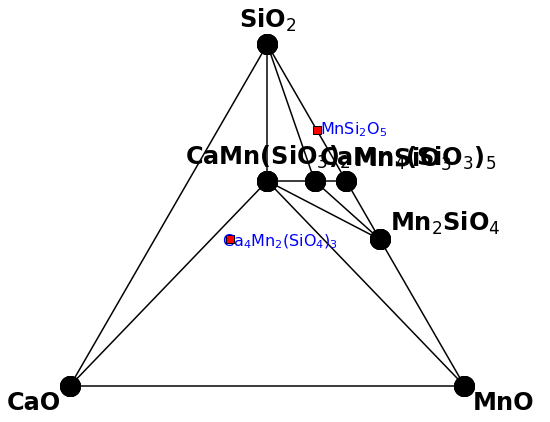

In [8]:
phase_diagram_2 = CompoundPhaseDiagram(entries,[Composition("CaO"),
                                                Composition("MnO"),
                                                Composition("SiO2")])
#CompoundPhaseDiagram:-Generates phase diagrams from compounds as terminations instead of elements


#get_plot and show:- Draw the phase diagram using Plotly (or Matplotlib) and show it.

compound_plotter_2 = PDPlotter(phase_diagram_2, show_unstable=True, backend = "matplotlib",  markersize=20)
z = compound_plotter_2.get_plot(label_unstable=True, label_stable=True)
#z.savefig('8-Ca4Mn2SiO.pdf')
z.show()

compound_plotter_2 = PDPlotter(phase_diagram_2, show_unstable=True, markerize=20)
y = compound_plotter_2.get_plot(phase_diagram_2, label_unstable=True)
y.show()


In [9]:
phase_diagram_3 = CompoundPhaseDiagram(entries,[Composition("Si"),
                                                Composition("Mn"),
                                                Composition("O2")])
#CompoundPhaseDiagram:-Generates phase diagrams from compounds as terminations instead of elements


#get_plot and show:- Draw the phase diagram using Plotly (or Matplotlib) and show it.

compound_plotter_3 = PDPlotter(phase_diagram_3, show_unstable=True, markerize=20)
y = compound_plotter_3.get_plot(phase_diagram_3, energy_colormap=None, label_unstable=True)
y.show()

